In [1]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [2]:
# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

(150, 2)


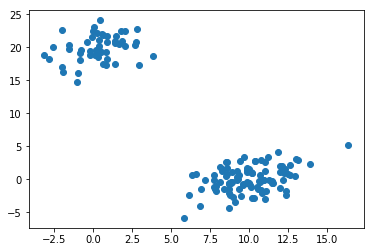

In [4]:
#Generating Sample Data
#You'll obviously not need this step to run the clustering if you have own data.

#The only thing you need to make sure is that you convert your data into a matrix X with n samples and m features, so that X.shape == (n, m).

# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print (X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

In [6]:
#Perform the Hierarchical Clustering
#Now that we have some very simple sample data, let's do the actual clustering on it:

#In [4]:
# generate the linkage matrix
Z = linkage(X, 'ward')

Done. That was pretty simple, wasn't it?

#Well, sure it was, this is python ;), but what does the weird 'ward' mean there and how does this actually work?

#As the scipy linkage docs tell us, 'ward' is one of the methods that can be used to calculate the distance between newly formed clusters. 'ward' causes linkage() to use the Ward variance minimization algorithm.

#I think it's a good default choice, but it never hurts to play around with some other common linkage methods like 'single', 'complete', 'average', ... and the different distance metrics like 'euclidean' (default), 'cityblock' aka Manhattan, 'hamming', 'cosine'... if you have the feeling that your data should not just be clustered to minimize the overall intra cluster variance in euclidean space. For example, you should have such a weird feeling with long (binary) feature vectors (e.g., word-vectors in text clustering).

#As you can see there's a lot of choice here and while python and scipy make it very easy to do the clustering, it's you who has to understand and make these choices. If i find the time, i might give some more practical advice about this, but for now i'd urge you to at least read up on the linked methods and metrics to make a somewhat informed choice. Another thing you can and should definitely do is check the Cophenetic Correlation Coefficient of your clustering with help of the cophenet() function. This (very very briefly) compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances, which in our case is pretty close:

In [8]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.98001483875742679

#
No matter what method and metric you pick, the linkage() function will use that method and metric to calculate the distances of the clusters (starting with your n individual samples (aka data points) as singleton clusters)) and in each iteration will merge the two clusters which have the smallest distance according the selected method and metric. It will return an array of length n - 1 giving you information about the n - 1 cluster merges which it needs to pairwise merge n clusters. Z[i] will tell us which clusters were merged in the i-th iteration, let's take a look at the first two points that were merged:

In [9]:
Z[0]

array([ 52.     ,  53.     ,   0.04151,   2.     ])

#
We can see that ach row of the resulting array has the format [idx1, idx2, dist, sample_count].
In its first iteration the linkage algorithm decided to merge the two clusters (original samples here) with indices 52 and 53, as they only had a distance of 0.04151. This created a cluster with a total of 2 samples.

In [11]:
Z[1]

array([ 14.     ,  79.     ,   0.05914,   2.     ])

 In the second iteration the algorithm decided to merge the clusters (original samples here as well) with indices 14 and 79, which had a distance of 0.04914. This again formed another cluster with a total of 2 samples.

The indices of the clusters until now correspond to our samples. Remember that we had a total of 150 samples, so indices 0 to 149. Let's have a look at the first 20 iterations:

In [12]:
Z[:20]

array([[  52.     ,   53.     ,    0.04151,    2.     ],
       [  14.     ,   79.     ,    0.05914,    2.     ],
       [  33.     ,   68.     ,    0.07107,    2.     ],
       [  17.     ,   73.     ,    0.07137,    2.     ],
       [   1.     ,    8.     ,    0.07543,    2.     ],
       [  85.     ,   95.     ,    0.10928,    2.     ],
       [ 108.     ,  131.     ,    0.11007,    2.     ],
       [   9.     ,   66.     ,    0.11302,    2.     ],
       [  15.     ,   69.     ,    0.11429,    2.     ],
       [  63.     ,   98.     ,    0.1212 ,    2.     ],
       [ 107.     ,  115.     ,    0.12167,    2.     ],
       [  65.     ,   74.     ,    0.1249 ,    2.     ],
       [  58.     ,   61.     ,    0.14028,    2.     ],
       [  62.     ,  152.     ,    0.1726 ,    3.     ],
       [  41.     ,  158.     ,    0.1779 ,    3.     ],
       [  10.     ,   83.     ,    0.18635,    2.     ],
       [ 114.     ,  139.     ,    0.20419,    2.     ],
       [  39.     ,   88.     ,

####### We can observe that until iteration 13 the algorithm only directly merged original samples. We can also observe the monotonic increase of the distance.

#In iteration 13 the algorithm decided to merge cluster indices 62 with 152. If you paid attention the 152 should astonish you as we only have original sample indices 0 to 149 for our 150 samples. All indices idx >= len(X) actually refer to the cluster formed in Z[idx - len(X)].

#This means that while idx 149 corresponds to X[149] that idx 150 corresponds to the cluster formed in Z[0], idx 151 to Z[1], 152 to Z[2], ...

#Hence, the merge iteration 13 merged sample 62 to our samples 33 and 68 that were previously merged in iteration 2 (152 - 2).

#Let's check out the points coordinates to see if this makes sense:

In [16]:
X[[33, 68, 62]]


array([[ 9.83913, -0.4873 ],
       [ 9.89349, -0.44152],
       [ 9.97793, -0.56383]])

In [17]:
#Seems pretty close, but let's plot the points again and highlight them:

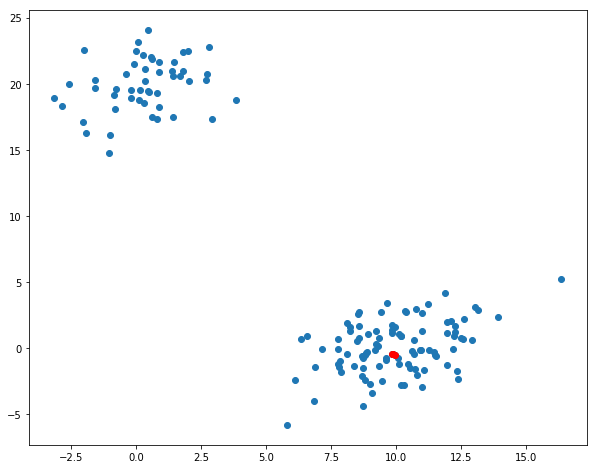

In [18]:
idxs = [33, 68, 62]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])  # plot all points
plt.scatter(X[idxs,0], X[idxs,1], c='r')  # plot interesting points in red again
plt.show()

###### We can see that the 3 red dots are pretty close to each other, which is a good thing. The same happened in iteration 14 where the alrogithm merged indices 41 to 15 and 69:

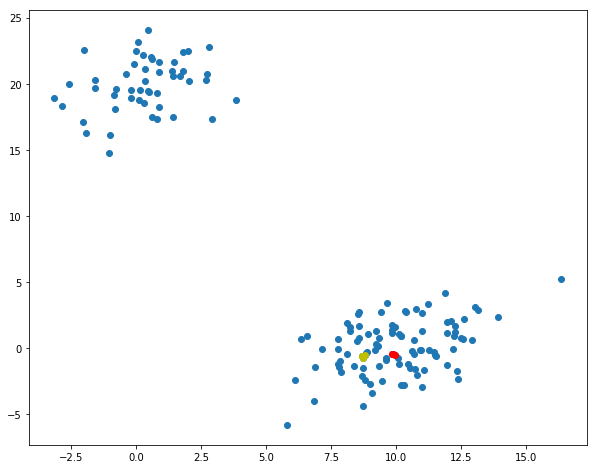

In [21]:
idxs = [33, 68, 62]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[idxs,0], X[idxs,1], c='r')
idxs = [15, 69, 41]
plt.scatter(X[idxs,0], X[idxs,1], c='y')
plt.show()

###### Showing that the 3 yellow dots are also quite close.

And so on...

We'll later come back to visualizing this, but now let's have a look at what's called a dendrogram of this hierarchical clustering first:

###### Plotting a Dendrogram
A dendrogram is a visualization in form of a tree showing the order and distances of merges during the hierarchical clustering.

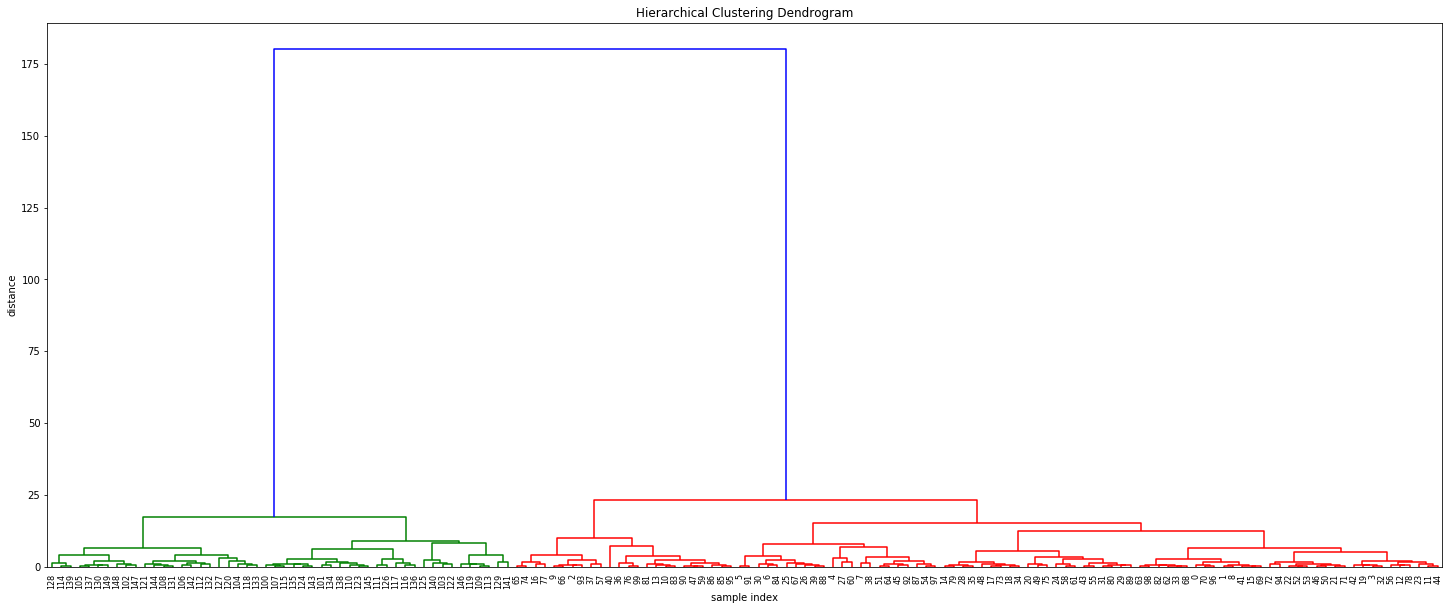

In [22]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [23]:
Z[-4:,2]

array([  15.11533,   17.11527,   23.12199,  180.27043])

###### Such distance jumps / gaps in the dendrogram are pretty interesting for us. They indicate that something is merged here, that maybe just shouldn't be merged. In other words: maybe the things that were merged here really don't belong to the same cluster, telling us that maybe there's just 2 clusters here.

Looking at indices in the above dendrogram also shows us that the green cluster only has indices >= 100, while the red one only has such < 100. This is a good thing as it shows that the algorithm re-discovered the two classes in our toy example.

In case you're wondering about where the colors come from, you might want to have a look at the color_threshold argument of dendrogram(), which as not specified automagically picked a distance cut-off value of 70 % of the final merge and then colored the first clusters below that in individual colors.

###### Dendrogram Truncation
As you might have noticed, the above is pretty big for 150 samples already and you probably have way more in real scenarios, so let me spend a few seconds on highlighting some other features of the dendrogram() function:

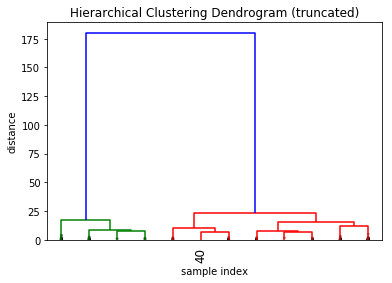

In [24]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

###### The above shows a truncated dendrogram, which only shows the last p=12 out of our 149 merges.

First thing you should notice are that most labels are missing. This is because except for X[40] all other samples were already merged into clusters before the last 12 merges.

The parameter show_contracted allows us to draw black dots at the heights of those previous cluster merges, so we can still spot gaps even if we don't want to clutter the whole visualization. In our example we can see that the dots are all at pretty small distances when compared to the huge last merge at a distance of 180, telling us that we probably didn't miss much there.

As it's kind of hard to keep track of the cluster sizes just by the dots, dendrogram() will by default also print the cluster sizes in brackets () if a cluster was truncated:

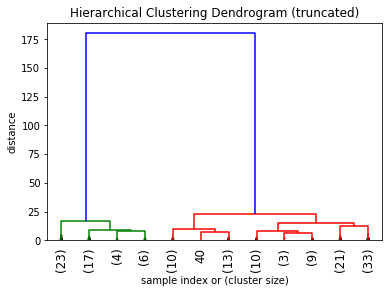

In [25]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [26]:
#We can now see that the right most cluster already consisted of 33 samples before the last 12 merges.